<a href="https://colab.research.google.com/github/etgcrog/rede-nerural/blob/master/bikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
%tensorflow_version 2.x

import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [168]:
df = pd.read_csv("day.csv")

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [170]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [171]:
df.drop(['instant', 'casual', 'registered', 'yr', 'mnth', 'holiday', 'weathersit'], axis=1, inplace=True)

In [172]:
df = df.set_index(pd.DatetimeIndex(df['dteday']))
df.drop(['dteday'], axis=1, inplace=True)

<Axes: >

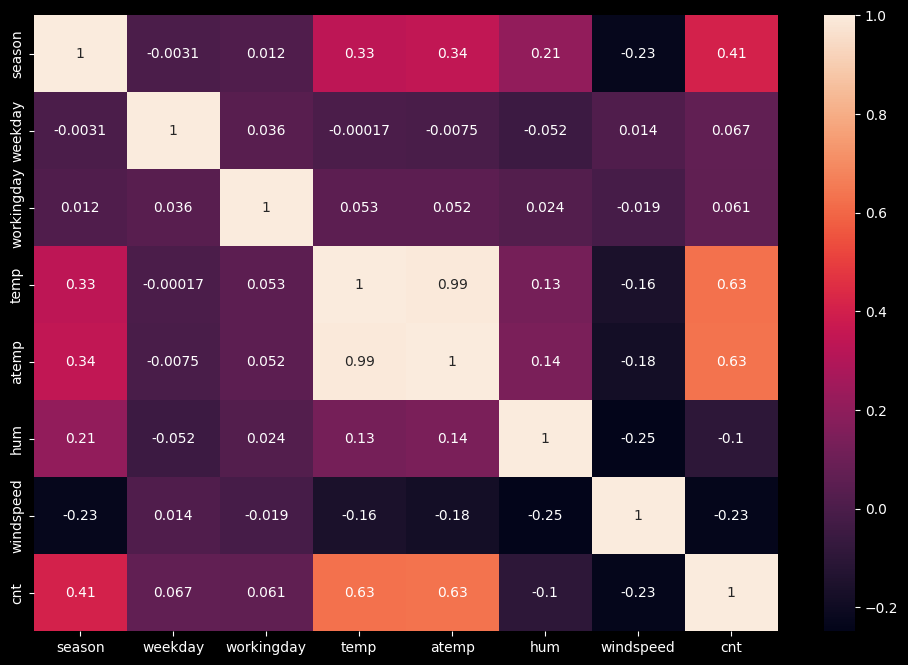

In [173]:
plt.style.use("dark_background")
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

Text(0, 0.5, 'Quantidade')

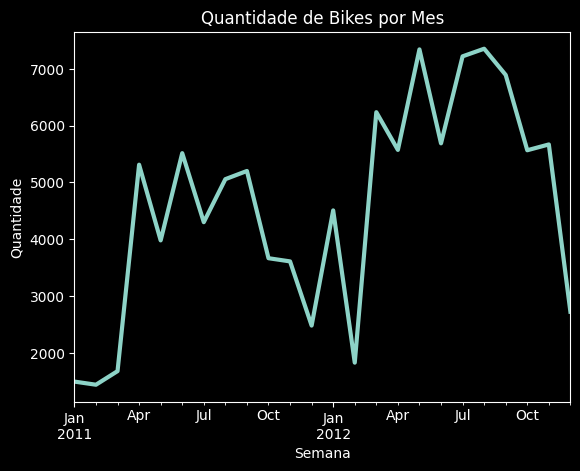

In [174]:
df['cnt'].asfreq('M').plot(linewidth=3)
plt.title("Quantidade de Bikes por Mes")
plt.xlabel('Semana')
plt.ylabel('Quantidade')

In [175]:
df.head()

,season,weekday,workingday,temp,atemp,hum,windspeed,cnt
dteday,,,,,,,,
2011-01-01,1,6,0,0.344167,0.363625,0.805833,0.160446,985
2011-01-02,1,0,0,0.363478,0.353739,0.696087,0.248539,801
2011-01-03,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
2011-01-04,1,2,1,0.200000,0.212122,0.590435,0.160296,1562
2011-01-05,1,3,1,0.226957,0.229270,0.436957,0.186900,1600


In [176]:
df['weekday'].value_counts()

6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: weekday, dtype: int64

In [179]:
df_numerical = df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]
df_categorical = df[['season', 'weekday']]

In [180]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(df_categorical).toarray()

In [181]:
df_numerical = df_numerical.reset_index()

In [182]:
df_categorical = pd.DataFrame(encoded)

df_final = pd.concat([df_categorical, df_numerical], axis=1)

In [183]:
df_final.drop("dteday", axis=1, inplace=True)

In [184]:
df_final.head(2)

,0,1,2,3,4,5,6,7,8,9,10,temp,atemp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.344167,0.363625,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363478,0.353739,0.696087,0.248539,801


In [185]:
X = df_final.drop('cnt', axis=1)
y = df_final['cnt'].array.reshape(-1, 1)

In [186]:
scaler = MinMaxScaler()
scaler.fit(y)
y = scaler.transform(y)

In [187]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [188]:
input_shape = x_train.shape[1]

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(input_shape,)))
model.add(tf.keras.layers.Dense(units=100 ,activation='relu'))
model.add(tf.keras.layers.Dense(units=100 ,activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [189]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               1600      
                                                                 
 dense_17 (Dense)            (None, 100)               10100     
                                                                 
 dense_18 (Dense)            (None, 100)               10100     
                                                                 
 dense_19 (Dense)            (None, 1)                 101       
                                                                 
Total params: 21,901
Trainable params: 21,901
Non-trainable params: 0
_________________________________________________________________


In [190]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [191]:
history = model.fit(x_train, y_train, epochs=20, batch_size=50, validation_split=0.2)

Epoch 1/20
9/9 [==============================] - 1s 43ms/step - loss: 0.2291 - val_loss: 0.0503
Epoch 2/20
9/9 [==============================] - 0s 10ms/step - loss: 0.0587 - val_loss: 0.0411
Epoch 3/20
9/9 [==============================] - 0s 10ms/step - loss: 0.0376 - val_loss: 0.0359
Epoch 4/20
9/9 [==============================] - 0s 11ms/step - loss: 0.0340 - val_loss: 0.0326
Epoch 5/20
9/9 [==============================] - 0s 10ms/step - loss: 0.0315 - val_loss: 0.0308
Epoch 6/20
9/9 [==============================] - 0s 10ms/step - loss: 0.0304 - val_loss: 0.0294
Epoch 7/20
9/9 [==============================] - 0s 12ms/step - loss: 0.0288 - val_loss: 0.0294
Epoch 8/20
9/9 [==============================] - 0s 10ms/step - loss: 0.0276 - val_loss: 0.0282
Epoch 9/20
9/9 [==============================] - 0s 10ms/step - loss: 0.0269 - val_loss: 0.0290
Epoch 10/20
9/9 [==============================] - 0s 11ms/step - loss: 0.0268 - val_loss: 0.0284
Epoch 11/20
9/9 [============

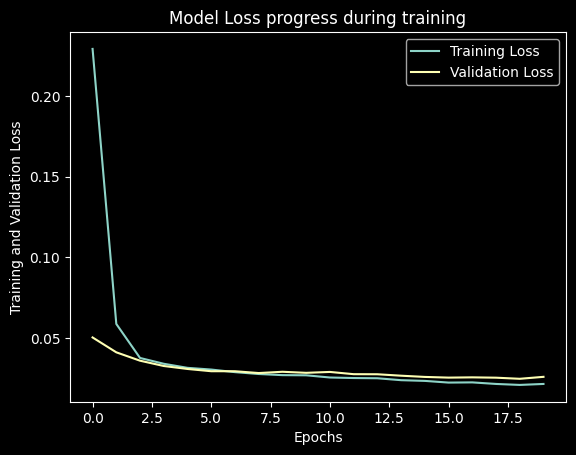

In [192]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss progress during training")
plt.xlabel("Epochs")
plt.ylabel('Training and Validation Loss')
plt.legend(["Training Loss", "Validation Loss"])

In [193]:
y_predict = model.predict(x_test)

7/7 [==============================] - 0s 3ms/step


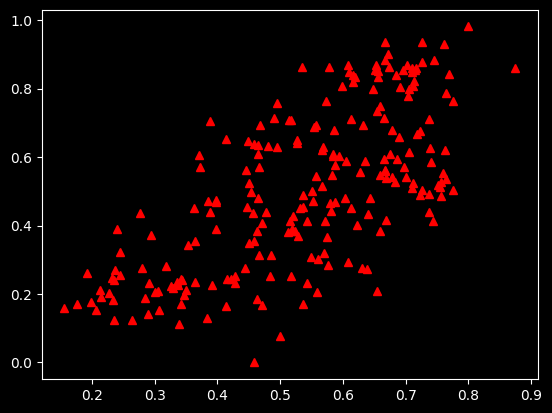

In [194]:
plt.plot(y_predict, y_test, "^", color='red')

In [195]:
y_predict

array([[0.49440634],
       [0.19904886],
       [0.52109176],
       [0.4676848 ],
       [0.5777097 ],
       [0.6563754 ],
       [0.2335745 ],
       [0.42770687],
       [0.7095249 ],
       [0.6886967 ],
       [0.22667319],
       [0.45060995],
       [0.6678188 ],
       [0.5935599 ],
       [0.4222861 ],
       [0.31859758],
       [0.29127032],
       [0.72621596],
       [0.705972  ],
       [0.1918223 ],
       [0.6672456 ],
       [0.7393952 ],
       [0.5664205 ],
       [0.21242812],
       [0.3004809 ],
       [0.63556427],
       [0.3440185 ],
       [0.6556334 ],
       [0.27679312],
       [0.46438387],
       [0.4847451 ],
       [0.6691062 ],
       [0.6134469 ],
       [0.71693933],
       [0.5851443 ],
       [0.52043957],
       [0.7022707 ],
       [0.63174504],
       [0.6086187 ],
       [0.2890621 ],
       [0.61308146],
       [0.36270863],
       [0.6521462 ],
       [0.66657317],
       [0.70511436],
       [0.49910358],
       [0.70978135],
       [0.370

In [196]:
y_predict_origin = scaler.inverse_transform(y_predict)

In [197]:
y_test_origin = scaler.inverse_transform(y_test)

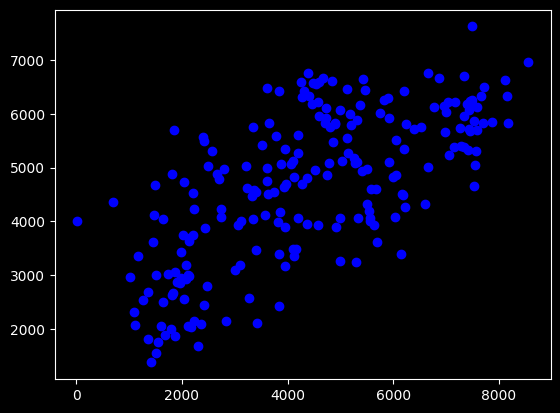

In [200]:
plt.plot(y_test_origin, y_predict_origin, "o", color='blue')

In [203]:
mae = mean_absolute_error(y_test_origin, y_predict_origin)
mse = mean_squared_error(y_test_origin, y_predict_origin)
rmse = sqrt(mse)
r2 = r2_score(y_test_origin, y_predict_origin)

In [204]:
print("MAE " ,mae, "\nMSE: ", mse, "\nRMSE ", rmse, "\nr2_score ", r2)

MAE  1245.6697687322444 
MSE:  2205397.0517263217 
RMSE  1485.0579287443038 
r2_score  0.445736151269984
